## Exercise 4.2 Theory of ICA

### 4.2.1 Difference between _uncorrelated_ and _statistical independence_

The goal of this part is to understand the difference between _uncorrelated_ and _statistical independent_ data sets.

In the previous part, you have seen that principal component analysis (PCA) finds a set of __orthogonal (uncorrelated)__  basis vectors pointing in the directions of maximal variance of the data set. Formally, two random variables X,Y are defined to be uncorrelated $:\Longleftrightarrow$ their covariance $\bf \operatorname{cov}(X,Y) = E(XY) − E(X)E(Y)$ is zero. Now, remember the Pearson correlation coefficient:

\begin{equation} \bf \rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} \end{equation}
If you compare the definition of uncorrelated and the definition of the correlation coefficient, you can easily see that two random variables with non-zero variance are uncorrelated $\Longleftrightarrow$ their correlation coefficient is zero. 

Independent component analysis (ICA) on the other hand is trying to find a set of basis vectors which are __statistically independent__. On an intuitive level, statistical independence between $\mathbf X$ and $\mathbf Y$ means that information about the outcome of $\mathbf X$ does not change the probability of the outcome of the other variable $\mathbf Y$. More rigorously, two random variables $\mathbf X$ and $\mathbf Y$ with cumulative distribution functions $F_X(x)$ and $F_Y(y)$, and probability density function $f_X(x)$ and $f_Y(y)$, are independent $\Longleftrightarrow$ the combined random variable $(\mathbf X, \mathbf Y)$ has a joint cumulative distribution function $F_{X,Y}(x,y)$ satisfying:

\begin{equation} F_{X,Y}(x,y) = F_X(x) F_Y(y) \end{equation}

__Task:__ Review the concepts of the correlation coefficient and statistical independence and answer the following question:

#### Q4.2.1 Which of the data sets in (x,y) are uncorrelated? Which are statistically independent? Which of the two properties is stronger?

__Hint:__ The correlation coefficient is zero (and thus X, Y are uncorrelated) if the slope of a linear fit is zero.

![title](data/Independence.png)

(1000, 2)


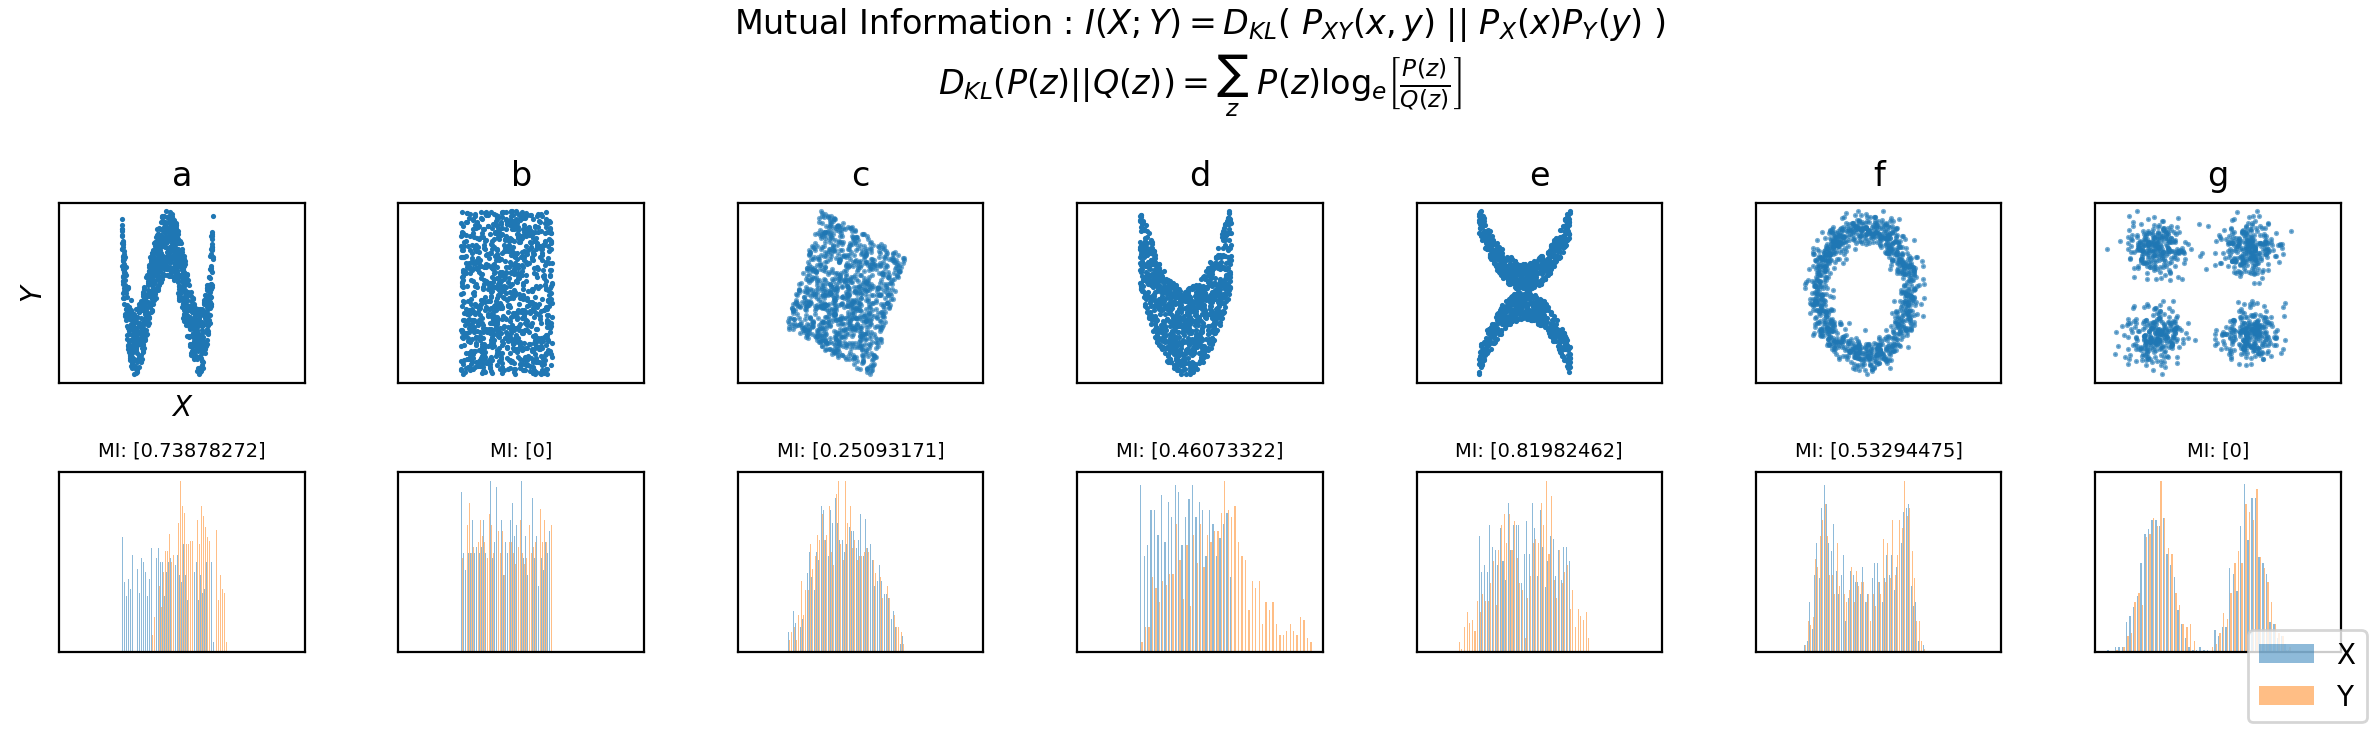

In [32]:
# -*- coding: utf-8 -*-
"""
Based on Covariance and Independence Wiki-file
Ref: https://en.wikipedia.org/wiki/File:Correlation_examples2.svg

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression as Dkl
#Dkl is a misnomer, we are actually calculating Mutual Information


# functions

def y1(x):
    return  4* (x**2 -1/2)**2 + np.random.uniform(-1,1, n)/3
    
def y2(x):
    return np.random.uniform(-1, +1, n)
    
def y3(x):
    return y2(x) # find a way to roatate this fucker
    
def y4(x):
    return 2*x**2 + np.random.uniform(-1, 1, n)
    
def y5(x):
    return (x**2 + np.random.uniform(0,1/2, n)) * np.random.choice(range(-1,2,2), size=n, replace=True)

def y6(x):
    return np.cos(x*np.pi) + np.random.normal(0, 1/8, n)

def x6(x):
    return np.sin(x*np.pi) + np.random.normal(0, 1/8, n)
    
def y7(x):
    global n
    N = int(n/4)
    v = 0.1
    y71 = np.random.multivariate_normal([1,  1], [ [v,  0],[0,  v]] , N)
    y72 = np.random.multivariate_normal([-1, 1], [ [v,  0],[0,  v]] , N)
    y73 = np.random.multivariate_normal([-1,-1], [ [v , 0],[0,  v]] , N)
    y74 = np.random.multivariate_normal([1, -1], [ [v,  0],[0,  v]] , N)
    return np.vstack((y71, y72, y73, y74 ))
    
def rotate(X, a=np.pi/8):
    rot_mat = np.array( [ [np.cos(a), np.sin(a)],
                          [-np.sin(a), np.cos(a)] ] )
    return rot_mat@X


# declare and initialise:
n=1000
x = np.random.uniform(low=-1, high=1, size=n)
b=50

l2 = np.sqrt(2+ np.sqrt(2)) / np.sqrt(2)

# plotting
fig, ax = plt.subplots(2, 7, figsize=(12,3), dpi=200, sharey=False, sharex=True, frameon=False)

for _, y, t in zip( range(7), [y1(x), y2(x), y3(x), y4(x), y5(x), y6(x), y7(x)] , 
                        ["a", "b", "c", "d", "e", "f", "g" ] ): 

    
    if _ == 6:
        print(y.shape)
        ax[0,_].scatter(y[:, 0], y[:, 1],  marker=".", s=3, alpha=0.6)
        ax[1, _].hist([y[:, 0], y[:, 1]], label = ["X", "Y"], bins=b, alpha=0.5)        
        ax[1, _].set_title( "MI: "+str( Dkl( y[:, 0].reshape(-1, 1),  y[:, 1]) ) , fontsize=7)
#        ax[1, _].legend()
        
    elif _ == 2:
        xy2 = rotate( np.array([x, y]) )
        ax[0,_].scatter(  xy2[0, :], xy2[1,:] , marker=".", s=3, alpha=0.6)
        ax[1, _].hist([xy2[0, :], xy2[1, :]], bins=b, alpha=0.5)
        ax[1, _].set_title( "MI: "+str( Dkl( xy2[0, :].reshape(-1, 1), xy2[1, :])) , fontsize=7)
        
    elif _ != 5 and _ != 2:    
        ax[0,_].scatter(x, y, marker=".", s=3)
        ax[1, _].hist([x, y], bins=b, alpha=0.5)
        ax[1, _].set_title( "MI: "+str(  Dkl( x.reshape(-1, 1), y) ) , fontsize=7)
        
    else:
        ax[0,_].scatter(x6(x), y, marker=".", s=3, alpha=0.6)
        ax[1, _].hist([x6(x), y], bins=b, alpha=0.5)
        ax[1, _].set_title( "MI: "+str( Dkl( x6(x).reshape(-1, 1), y) )  , fontsize=7)
    
    ax[0, _].set_title(t)    
    

fig.tight_layout()
fig.legend(loc=4)

ax[0, 0].set_xlabel(r"$X$"); ax[0, 0].set_ylabel(r"$Y$")

for _ in ax.flat:
    _.set_xticks([])
    _.set_yticks([])
    
plt.subplots_adjust(hspace=0.5)
    
ax = fig.add_subplot(111, frameon=False)
plt.xticks([]), plt.yticks([])
plt.title("Mutual Information : "+
    r"$I(X;Y) = D_{KL}($ $P_{XY}(x,y)$ $||$ $P_X(x)P_Y(y)$ $)$"+"\n"+
    r"$D_{KL} ( P(z)||Q(z) ) = \sum_z$ $P(z) \log_e \left[ \frac{P(z)} {Q(z)} \right]$", pad=35)

# plt.savefig("MI", dpi= 350, bbox_inches='tight', pad_inches=0.25 )
# %matplotlib inline
plt.show()


correlation reflects the noisiness and direction of a linear relationship,
but not the slope of that relationship, nor many aspects of nonlinear relationships 
i.e., row one a-c positive corr. increasingly noisy, d no corr, e-g negative corr. increasingly less noisy
also correlation = dependance

statistical independence: joint probability is product of individual probabilities
i.e., 2e-g knowing the value of x tells us little about the value of y
i.e., 2a, 2d are polynomial functions, thus info about X tells us something about Y, thus dependent
i.e., 2b, 2c less 

----------------------------------------------------------------------------------------------
==>
1. [1.d] and [2.all] appear to be uncorrelated. i.e., the Pearson correlation coefficient is 0.

2. [1.d], [2. b, c, g] are relatively statistically independent (We used Mutual Information as a metric to ascertain that)

3. Statistical independence is more stringent than covariance/correlation coefficient. 

### 4.2.2 Basics about ICA

Next, we want to cover the basics of independent component analysis (ICA). ICA is a computational method for separating a multivariate signal (e.g. sounds) into (independent) additive subcomponents (e.g. speakers or singers). 

The standard model for ICA for the same number of sources and signals is:

\begin{equation} 
\mathbf x = \mathbf {A s}
\end{equation}

where $\mathbf x=(x_i,...x_D)$ is a column vector with the observations (e.g. in time) $\mathbf x_i \in \mathbb R^T$, $\mathbf s=(s_1,...s_D)$ is the source vector containing the original components $\mathbf s_i \in \mathbb R^T$ and $\mathbf A \in \mathbb R^{D \times D}$ is a linear transformation that defines the linear mixing of the constituent signals. Typically, $\mathbf A$ and $\mathbf s$ are unknown. 

__Task__: Review the lecture slides or other literature about ICA and answer the following questions:

#### Q4.2.2 What are the central assumptions for the ICA to work? 

----
    The source signals are independent of each other.
    The values in each (at least, n-1) source signal have non-Gaussian distributions.


### 4.2.3 Ambiguities in ICA

In comparison to PCA, ICA has two major ambiguities:

1. We cannot determine the variances (energies) of the independent components.
2. We cannot determine the order of the independent components.

#### Q4.2.3 Why do these ambiguities occur? __Hint__: Answer this questions by looking at the standard model $\mathbf x = \mathbf {As}$.
-----

    For (1) we only know the mixed signal (x), but neither sources (s), nor the mixing matrix (A) are known to us. Thus magnitudes of a source might be cancelled by dividing the approriate column of A by a corresponding scalar. Might as well fix it so it has one unit variance.
    
    => Since, the linear mixing of unknown source signal(s) is done by A, and we don't know A as well, we can't get the exact inverse of A (W)...it is just an estimate, and therefore, the predicted source variance would not be exact. 
    
    
    For (2) As is unknown and we can permutate the elements of the addition Sigma(a_i, s_i).
    
    => Since, W is an estimate of A^(-1), it is posstible that there are infinitely many solutions to system of linear equations problem.

### 4.2.4  FastICA and negentropy

Here, you will use an implementation of ICA which is called FastICA. It is an iterative fixed-point scheme which is minimizing the entropy (or equivalently maximizing the negative entropy (negentropy)) in order to find the independent components. 

The entropy of a random variable can be interpreted as the degree of information that the observation of the variable gives. The more “random”, i.e.  unpredictable and unstructured the variable is, the larger its entropy. 

#### Q4.2.4 Find out which special property the normal distribution has with respect to entropy for a fixed variance. How can this property be used for finding the independent components?

---
- a  gaussian  variable  has  the  largest  entropy  among  all random variables of equal variance
- the gaussian distribution is the “most random” or the least structured of all distributions.
- entropy is small for distributions that are clearly concentrated on certain values, i.e., when the variable is clearly clustered, or has a pdf that is very “spiky” (i.e., Laplace with kurtosis = 3)
- measure of nongaussianity that is zero for a gaussian variable and always nonnegative J(y) = H(y_gauss)−H(y)
- where H is entropy function and y_gauss is a Gaussian  random variable of the same  covariance matrix as y
- basically, find a good compromise between the properties of the two classical nongaussianity measures given by kurtosis (which is not robust) and negentropy (which is computationally costly)
- FastICA = method of maximization for the contrast function

##### FastICA for one unit (i.e., estimate one independent component) vs. for several units different especially in how carefully convergence is treated (that is, make sure solutions are not the same?)
---
- for one unit
1.  Choose an initial (e.g. random) weight vector w.
2.  Let w += E{x * g(w.T * x)} − E{g′(w.T * x)} w
3.  Let w = w+/‖w+‖
4.  If not converged, go back to 2.

- convergence =  old and new values of w point in the same direction, i.e. their dot-product is(almost) equal to 1. It is not necessary that the vector converges to a single point, since w and −w define the same direction.

##### Applications
---
- separation of artifacts in MEG data (similar to the lecture)
    - using the ICA technique and the FastICA algorithm, it is possible to isolate both eye movement and eye blinking artifacts, as well as cardiac, myographic, and other artifacts from MEGsignals.  The FastICA algorithm is an especially suitable tool, because artifact removal is an interactive technique and the investigator may freely choose how many of the IC’s he or she wants.
    
- finding hidden factors in financial data
    - For example, factors like seasonal variations due to holidays and annual variations, and factors having a  sudden effect on  the  purchasing power of  the  customers like prize  changes of  various commodities,  can  be expected to have an effect on all the retail stores, and such factors can be assumed to be roughly independent of each other. Yet, depending on the policy and skills of the individual manager like e.g. advertising efforts, the effect of the factors on the cash flow of specific retail outlets are slightly different. By ICA, it is possible to isolate both the underlying factors and the effect weights, thus also making it possible to group the stores on the basis of their managerial policies using only the cash flow time series data
    
- reducing noise in natural images
    - image model: x = z + n, where n is uncorrelated and Gaussian and z is non-Gaussian
    - if we model the density of x by ICA ,and  assume n Gaussian,  then  the  Maximum Likelihood (ML)  solution  for x given  the  measurement z can  be developed in the signal model



### 4.2.5 Preprocessing

Before applying ICA, most algorithms expect you to preprocess your data. Commonly, two preprocessing steps are applied before performing an ICA: __Centering__ and __Whitening__.

__Centering__ is done by simply subtracting the sample mean, i.e. $\bf x_c = x - \bar x$. This is equivalent to a translation of the data such that they are positioned around the origin.

__Whitening__ is a transformation that converts the data such that it has an identity covariance matrix. Let $\hat \Sigma$ be the estimated covariance matrix. Then $\bf x_w = \hat \Sigma^{-\frac{1}{2}} x_c$ would be the new whitened vector with zero mean and identity covariance matrix. 

> from hyällmaren: whitening means that before the application of the ICA algorithm (and after centering),we transform the observed vector x linearly so that we obtain a new vector ̃x which is white, i.e. its components are uncorrelated and their variances equal unity. In otherwords, the covariance matrix of ̃x equals the identity matrix<

One popular method for whitening is to use the eigenvalue decomposition (EVD) of the covariance matrix: $\bf \hat \Sigma = EDE^T$ where ${\bf E}$ is the orthogonal matrix of eigenvectors of $\hat \Sigma$ and ${\bf D}$ is the diagonal matrix of its eigenvalues, ${\bf D}= \mbox{diag}(d_1,...,d_D)$. Whitening can now be done by computing

\begin{equation} {\bf x_w}={\bf E}{\bf D}^{-1/2}{\bf E}^T {\bf x_c} \end{equation} 

where the matrix ${\bf D}^{-1/2}$ is computed by a simple component-wise operation as ${\bf D}^{-1/2}=\mbox{diag}(d_1^{-1/2},...,d_D^{-1/2})$.

Below you see an implementation and the effect of centering and whitening.

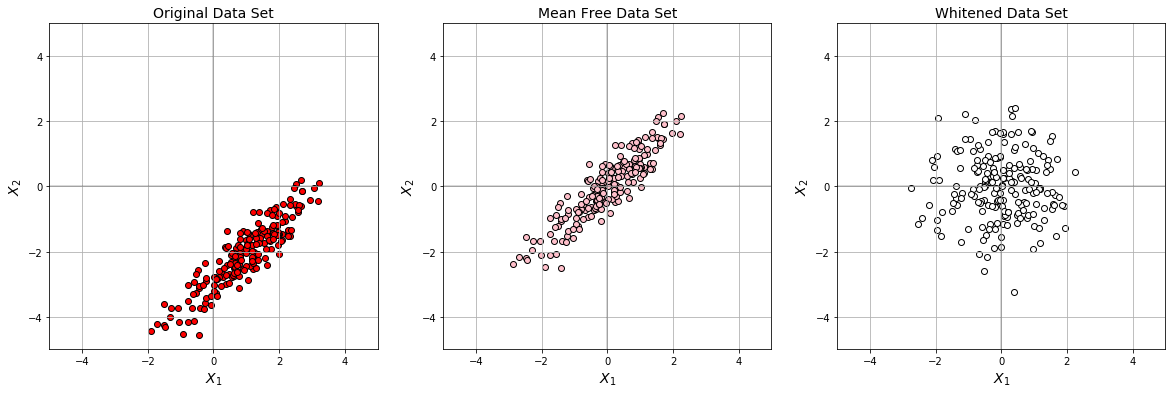

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create normally distributed data-set
N_samples = 200;
X=np.random.multivariate_normal([1,-2],[[1,0.9],[0.9,1]],N_samples)

# Centering
X_meanfree = X - np.mean(X,axis=0) 

# Whitening
X_cov = np.cov(X.T)
[D,E] = np.linalg.eig(X_cov)
D = np.diag(1/np.sqrt(D))
X_white = np.dot(np.dot(np.dot(E,D),E.T),X_meanfree.T).T
#print(np.cov(X_white.T)) #Should be identity

#Draw the figure
f, ax = plt.subplots(1, 3,figsize=(20, 6))    
for k, c in zip(range(3), ["r", "pink", "White"]):
    if k==0:
        X_temp = X
        ax[k].set_title('Original Data Set',fontsize = 14)
    elif k == 1:
        X_temp = X_meanfree
        ax[k].set_title('Mean Free Data Set',fontsize = 14)
    elif k == 2:
        X_temp = X_white 
        ax[k].set_title('Whitened Data Set',fontsize = 14)           
    
    #X_temp = np.array(X_temp)
    ax[k].scatter(X_temp[:,0],X_temp[:,1], color=c, marker="o", edgecolors="k")
    ax[k].set_xlim([-5,5])
    ax[k].set_ylim([-5,5])
    ax[k].grid()
    ax[k].set_xlabel('$X_1$',fontsize = 14)
    ax[k].set_ylabel('$X_2$',fontsize = 14)
    ax[k].axvline(c="k", lw=0.3)
    ax[k].axhline(c="k", lw=0.3)

#### Q4.2.5 Why is it useful to whiten the data?
---
- for good or at least interesting examples check: https://theclevermachine.wordpress.com/2013/03/30/the-statistical-whitening-transform/
- also: https://joelouismarino.github.io/posts/2017/08/statistical_whitening/
- basically, we are looking at yet another way to reduce redundant (based on our assumptions) information
    - important patterns in the data often correspond to the relative relationships between the different input dimensions (that is by standardizing units and reducing offsets we make the important stuff more poignant more wow there it is)
    - the whitening matrix could be used to express where an impulse comes from or center-surround inhibitory-excitatory behaviour (e.g., in retinal ganglion cells)
    